In [28]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network


TypeError: Image data of dtype object cannot be converted to float

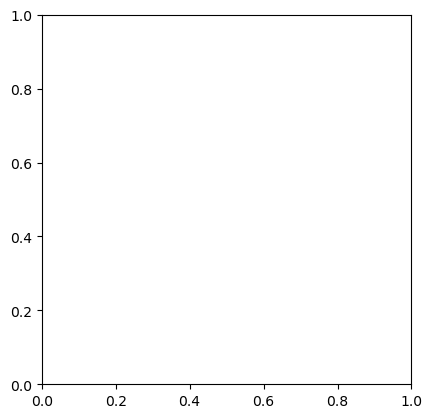

In [29]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 6000)
x_test, y_test = preprocess_data(x_test, y_test, 1000)

# neural network
network = [
    Dense(28 * 28, 40, regularization=0.01),
    Tanh(),
    Dense(40, 10, regularization=0.01),
    Tanh()
]
network_image = visualize_network(network)

# show network (network_image is a PIL image)
plt.imshow(np.array(network_image))


In [25]:

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=1000000000, batch_size = 6, learning_rate=0.01)


1/1000000000, error=0.9323383759411568
2/1000000000, error=0.8253813687949908
3/1000000000, error=0.7201887129027021
4/1000000000, error=0.6107926098775891
5/1000000000, error=0.472985535327551
6/1000000000, error=0.3066119110125866
7/1000000000, error=0.17331046229398092
8/1000000000, error=0.1066459005619897
9/1000000000, error=0.08011676518352251
10/1000000000, error=0.0695423111068805
11/1000000000, error=0.0645880504161802
12/1000000000, error=0.061680981631908355
13/1000000000, error=0.059691385047071284
14/1000000000, error=0.05825684733108424
15/1000000000, error=0.05722522545326621
16/1000000000, error=0.0565015435057114
17/1000000000, error=0.05600425975869558
18/1000000000, error=0.05565678056836852
19/1000000000, error=0.05539614033751793
20/1000000000, error=0.05517954835285304
21/1000000000, error=0.054983938561641084
22/1000000000, error=0.05480129382620463
23/1000000000, error=0.05463182582366427
24/1000000000, error=0.05447767046701362
25/1000000000, error=0.0543396314

KeyboardInterrupt: 

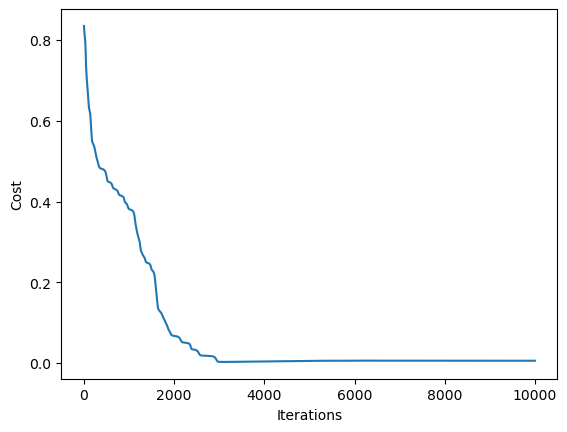

error: 0.0908792893648827
pred: 4 	true: 7
pred: 1 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 9 	true: 4
pred: 4 	true: 9
pred: 5 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 4 	true: 5
pred: 4 	true: 9
pred: 4 	true: 7
pred: 1 	true: 3
pred: 4 	true: 4
pred: 9 	true: 9
pred: 4 	true: 6
pred: 9 	true: 6
pred: 5 	true: 5
pred: 4 	true: 4
pred: 0 	true: 0
pred: 4 	true: 7
pred: 4 	true: 4
pred: 0 	true: 0
pred: 9 	true: 1
pred: 5 	true: 3
pred: 4 	true: 1
pred: 4 	true: 3
pred: 4 	true: 4
pred: 1 	true: 7
pred: 4 	true: 2
pred: 5 	true: 7
pred: 9 	true: 1
pred: 1 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 5 	true: 7
pred: 9 	true: 4
pred: 1 	true: 2
pred: 5 	true: 3
pred: 4 	true: 5
pred: 5 	true: 1
pred: 1 	true: 2
pred: 9 	true: 4
pred: 4 	true: 4
pred: 4 	true: 6
pred: 9 	true: 3
pred: 9 	true: 5
pred: 4 	true: 5
pred: 1 	true: 6
pred: 4 	true: 0
pred: 4 	true: 4
pred:

In [ ]:

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
